# Car Resale Value Prediction

## Kaggle Vehicle Dataset
**[Link to Dataset](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=CAR+DETAILS+FROM+CAR+DEKHO.csv)**

In [1]:
# Importing required libraries
import pickle
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

%matplotlib inline

In [2]:
# Importing the dataset
df = pd.read_csv('car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
# Checking the dataframe shape
df.shape

(301, 9)

In [4]:
# Exploring data statistics
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
# Checking for any null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
# Printing all categorical features and their values
print('Types of fuel:', df['Fuel_Type'].unique())
print('Types of seller:', df['Seller_Type'].unique())
print('Types of transmission:', df['Transmission'].unique())
print('Types of owner:', df['Owner'].unique())

Types of fuel: ['Petrol' 'Diesel' 'CNG']
Types of seller: ['Dealer' 'Individual']
Types of transmission: ['Manual' 'Automatic']
Types of owner: [0 1 3]


In [7]:
# Dropping unrequired features from dataframe
df.drop(['Car_Name'], axis = 1, inplace = True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
# Creating new feature - 'num_years' (current year - year) to calculate age of car
df['Num_Years'] = datetime.datetime.now().year - df['Year']
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Num_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [9]:
# Dropping feature 'year' (car manufacture year) from dataframe
df.drop(['Year'], axis = 1, inplace = True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Num_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [10]:
# Converting categorical features into dummy variables
df = pd.get_dummies(df, drop_first = True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Num_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [11]:
# Getting correlation matrix for the dataset
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Num_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Num_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [12]:
# Creating a Resale Value Percentage feature for understanding data
df['Resale_Percentage'] = round(df['Selling_Price'] / df['Present_Price'] * 100, 2)

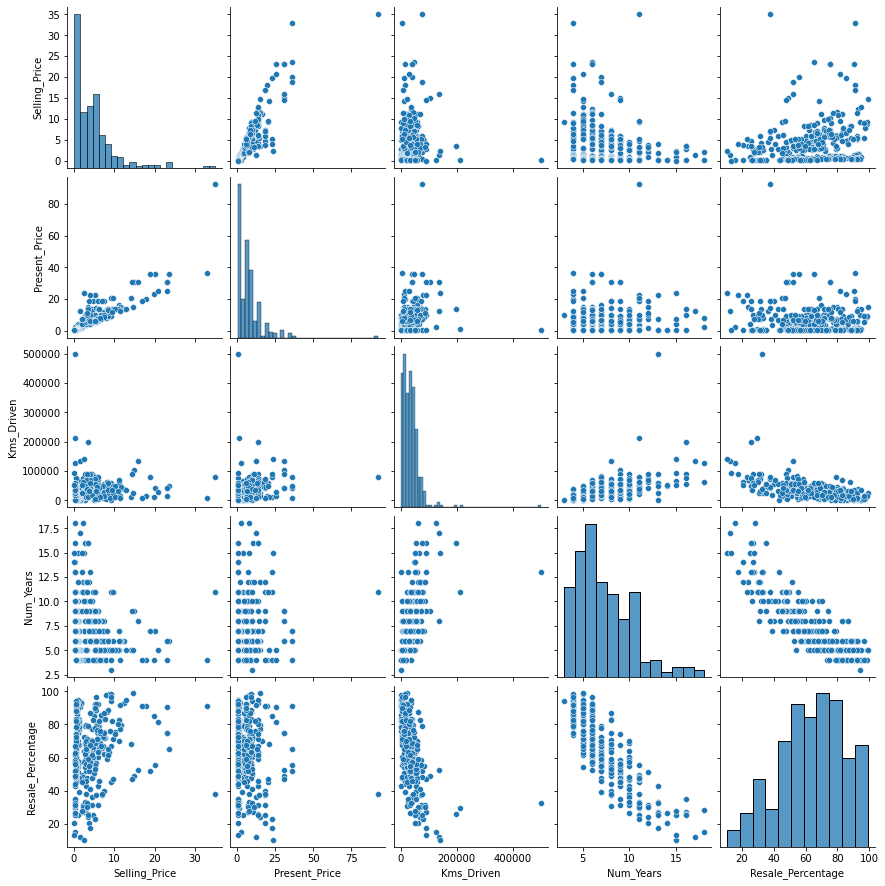

In [13]:
# Plotting the pairplot for the dataset
sns.pairplot(df[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Num_Years', 'Resale_Percentage']])

<AxesSubplot:>

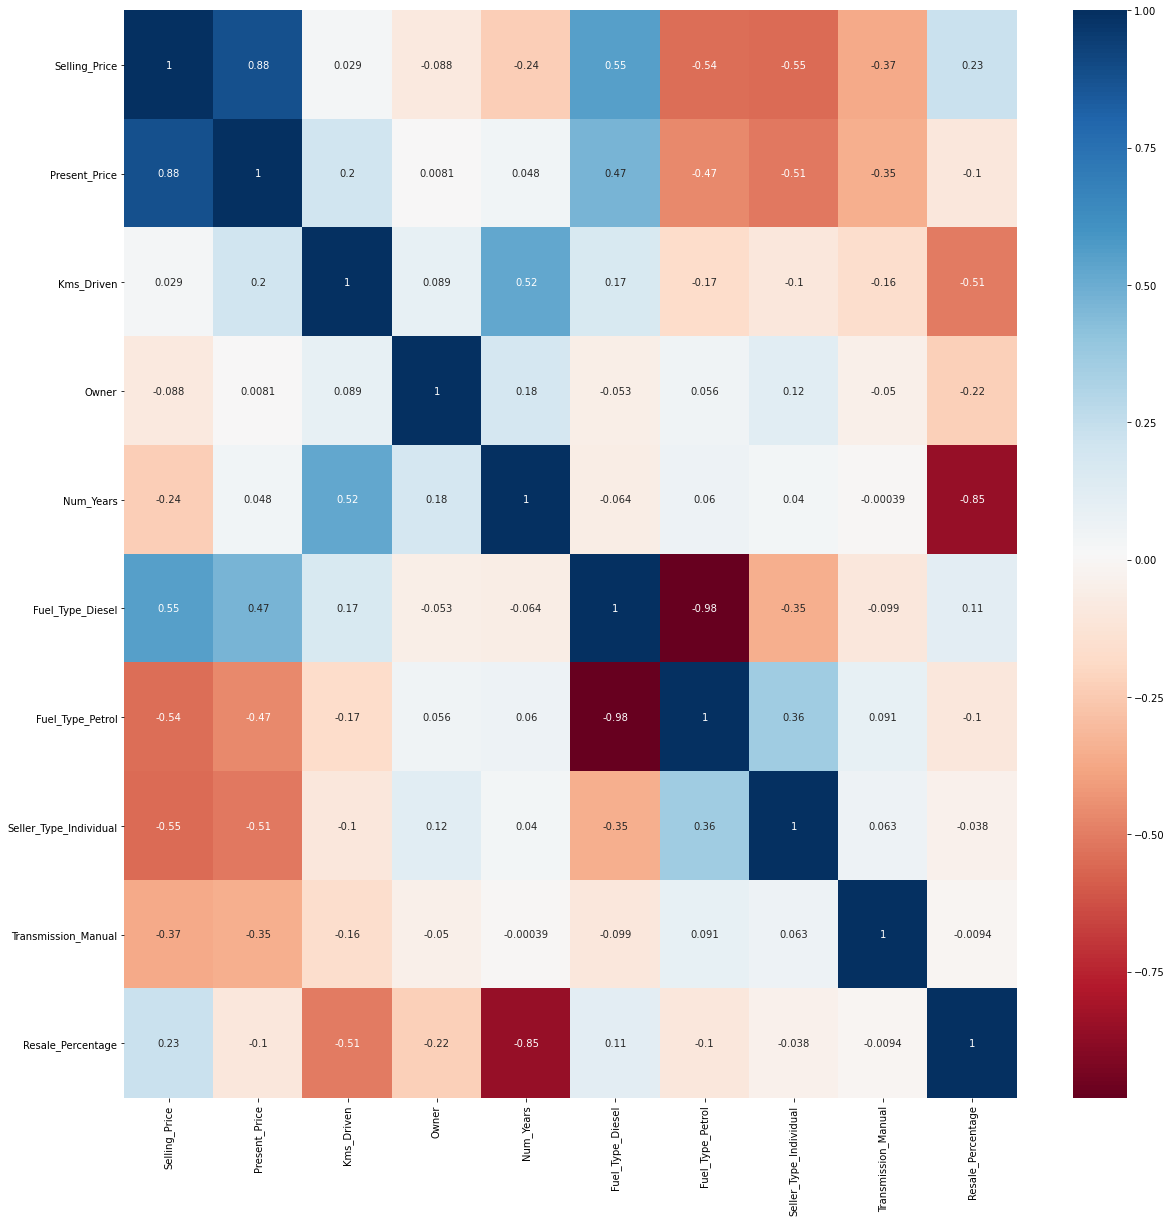

In [14]:
# Plotting the correlation heatmap
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True, cmap = 'RdBu')

In [15]:
# Dropping the 'Resale_Percentage' feature
df.drop(['Resale_Percentage'], axis = 1, inplace = True)

In [16]:
# Extracting dependent and independent features
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [17]:
X.head()

,Present_Price,Kms_Driven,Owner,Num_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [18]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [19]:
# Getting feature importances
model = ExtraTreesRegressor()
model.fit(X, y)
print(model.feature_importances_)

[0.401019   0.04184067 0.00048337 0.07637049 0.21458786 0.01396357
 0.1189945  0.13274053]


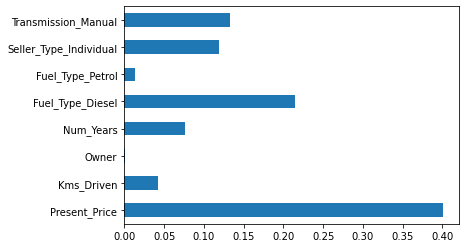

In [20]:
# Plotting barplot feature importances
feature_imp = pd.Series(model.feature_importances_, index = X.columns)
feature_imp.plot(kind = 'barh')
plt.show()

In [21]:
# Dropping 'Owner' feature as its importance is very low
df.drop(['Owner'], axis = 1, inplace = True)

[0.37338901 0.03971805 0.07811791 0.22399295 0.01095715 0.13752305
 0.13630188]


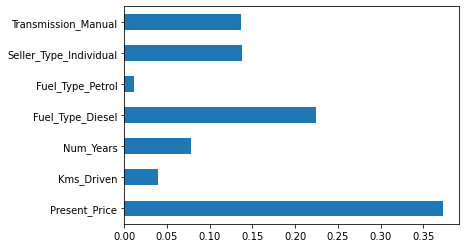

In [22]:
# Extracting features from updated dataframe
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Getting new feature importances
model = ExtraTreesRegressor()
model.fit(X, y)
print(model.feature_importances_)

# Plotting barplot for new feature importances
feature_imp = pd.Series(model.feature_importances_, index = X.columns)
feature_imp.plot(kind = 'barh')
plt.show()

In [23]:
# Splitting dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2)

#### Linear Regression

In [24]:
# Creating a linear regression model
linear_regressor = LinearRegression(n_jobs=-1)
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)

In [25]:
# Computing some performance metrics
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 1.2346931037304398
Mean Squared Error: 4.196277303132508
Root Mean Squared Error: 2.04848170680934
R2 Score: 0.8467812557718505


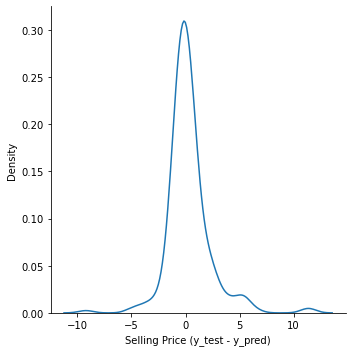

In [26]:
# Plotting histogram of difference between y_pred and y_test
sns.displot(y_test - y_pred, kind = 'kde')
plt.xlabel('Selling Price (y_test - y_pred)')
plt.show()

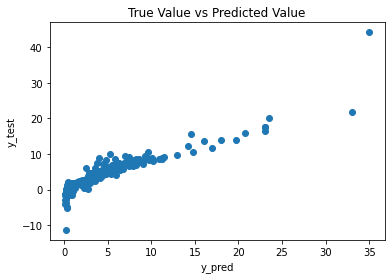

In [27]:
# Plotting scatterplot between y_pred and y_test
plt.scatter(y_test, y_pred)
plt.title('True Value vs Predicted Value')
plt.ylabel('y_test')
plt.xlabel('y_pred')
plt.show()

#### Support Vector Regression

In [28]:
# Creating a hyperparamter value grid for hyperparamter tuning
random_grid = {
    'C' : [0.1, 1, 10],
    'epsilon' : [0.01, 0.1, 1]
}

In [29]:
# Creating a RandomSearchCV model
support_vector_regressor = RandomizedSearchCV(estimator=SVR(), param_distributions=random_grid,
                                              scoring='neg_mean_squared_error', n_iter=10, cv=5, 
                                              verbose=1, n_jobs=-1)
support_vector_regressor.fit(X_train, y_train)

C:\Users\RISHABH\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 9 candidates, totalling 45 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1]},
                   scoring='neg_mean_squared_error', verbose=1)

In [30]:
# Printing best score and best hyperparameter values
print('Best Score:', support_vector_regressor.best_score_)
print('Best Hyperparamters:', support_vector_regressor.best_params_)

Best Score: -18.488439560490036
Best Hyperparamters: {'epsilon': 1, 'C': 10}


In [31]:
# Creating final model with best hyperparameter values
support_vector_regressor = SVR(C=10, epsilon=1)
support_vector_regressor.fit(X_train, y_train)
y_pred = support_vector_regressor.predict(X_test)

In [32]:
# Computing some performance metrics
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 3.473097408420735
Mean Squared Error: 30.072223069123147
Root Mean Squared Error: 5.483814645766499
R2 Score: -0.09802759015955798


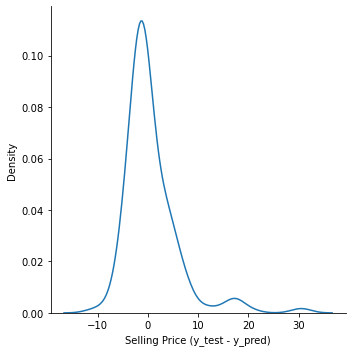

In [33]:
# Plotting histogram of difference between y_pred and y_test
sns.displot(y_test - y_pred, kind = 'kde')
plt.xlabel('Selling Price (y_test - y_pred)')
plt.show()

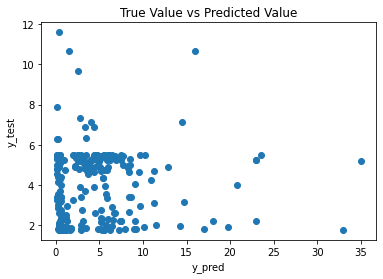

In [34]:
# Plotting scatterplot between y_pred and y_test
plt.scatter(y_test, y_pred)
plt.title('True Value vs Predicted Value')
plt.ylabel('y_test')
plt.xlabel('y_pred')
plt.show()

#### Random Forest Regression

In [35]:
# Creating a default (simple) Random Forest Regressor model
random_forest_regressor = RandomForestRegressor(n_jobs=-1)
random_forest_regressor.fit(X_train, y_train)
y_pred = random_forest_regressor.predict(X_test)

# Performance Metrics
print('R2 score: ', r2_score(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

R2 score:  0.7078442261091236
Mean Squared Error:  8.00141424688796


In [36]:
# Creating RandomizedSearchCV grid

n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [37]:
# Creating a RandomSearchCV model
random_forest_regressor = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=random_grid,
                                             scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=1, n_jobs=-1)
random_forest_regressor.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=1)

In [38]:
# Printing the best parametets and best score
print('Best Parameter:', random_forest_regressor.best_params_)
print('Best Score:', random_forest_regressor.best_score_)

Best Parameter: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}
Best Score: -1.7018199496759348


In [39]:
# Creating a final random Forest Regression model with best hyperparameter values
random_forest_regressor = RandomForestRegressor(n_estimators=1000, min_samples_split=2, min_samples_leaf=1,
                                                max_features='auto', max_depth=20, n_jobs=-1)
random_forest_regressor.fit(X_train, y_train)
y_pred = random_forest_regressor.predict(X_test)

In [40]:
# Computing some performance metrics
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 1.278691618257259
Mean Squared Error: 7.574130307710376
Root Mean Squared Error: 2.752113789019338
R2 Score: 0.7234456518158505


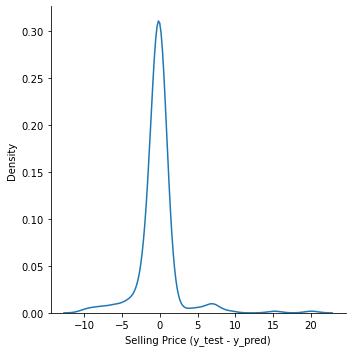

In [41]:
# Plotting histogram of difference between y_pred and y_test
sns.displot(y_test - y_pred, kind = 'kde')
plt.xlabel('Selling Price (y_test - y_pred)')
plt.show()

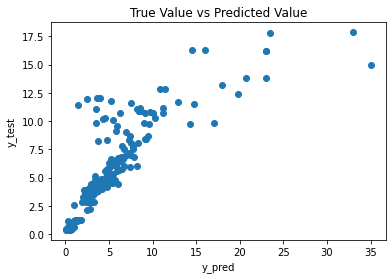

In [42]:
# Plotting scatterplot between y_pred and y_test
plt.scatter(y_test, y_pred)
plt.title('True Value vs Predicted Value')
plt.ylabel('y_test')
plt.xlabel('y_pred')
plt.show()

In [43]:
# Exporting the models to a pickle file

# Open file in desired location/directory
file = open('models.pkl', 'wb') 
# Dump information to that file
pickle.dump([linear_regressor, support_vector_regressor, random_forest_regressor], file)
# Close the file
file.close()